## Notebook for designing dataI, dataII, dataIII

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import tensorflow as tf
import pandas as pd
import glob2
import os
from itertools import product
import numpy as np
#import seaborn as sns

%matplotlib notebook
#%matplotlib

from tboard import file2number
from vis_utils import split_posneg,get_path
from vis_utils import get_neuron_values
from nonlinearities import sigmoid
from vis_utils import splitL

clist=['g','c','m','y','k','b','r']
listLineStyle=['solid', 'dashed', 'dashdot', 'dotted']

In [2]:
from vis_utils import (split_posneg , get_path, get_np_network,
                        get_neuron_values, splitL, load_weights,
                        resample_grid,vec_get_neuron_values,
                        get_del_weights  )
from calc_maps import (get_net_states,rescale_weights,compose_affine)

In [3]:
from toydata import *

<IPython.core.display.Javascript object>


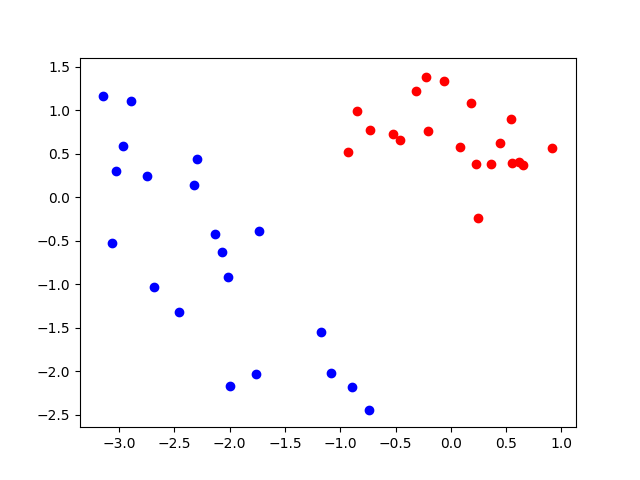

In [4]:
datafn_to_scatter(data1)

<IPython.core.display.Javascript object>


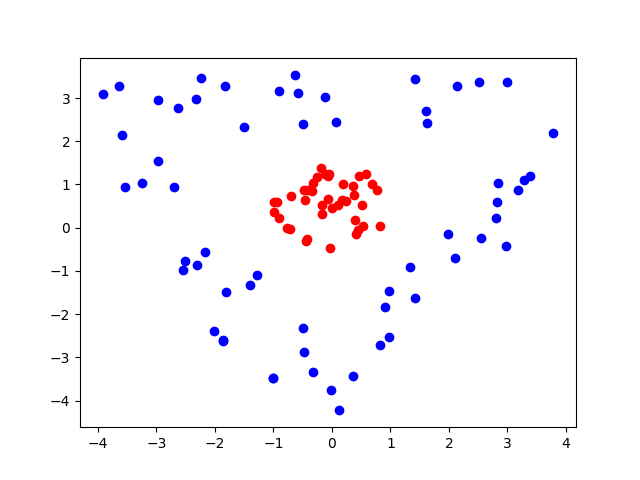

In [5]:
datafn_to_scatter(data2)

<IPython.core.display.Javascript object>


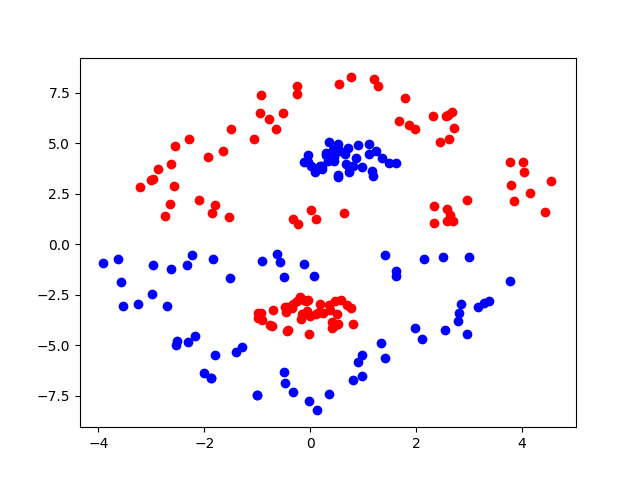

In [6]:
datafn_to_scatter(data3)

<IPython.core.display.Javascript object>


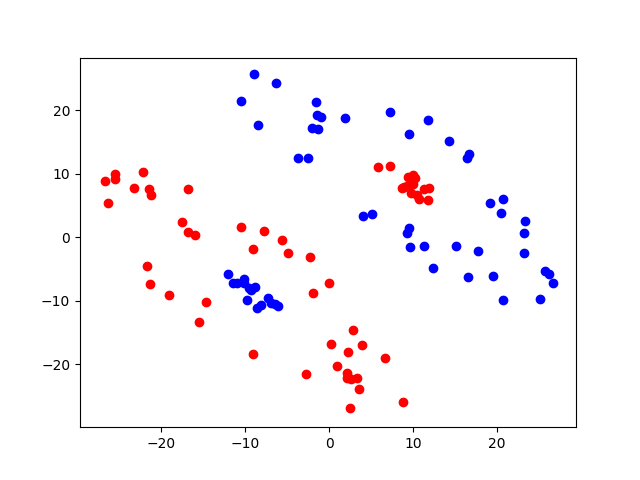

In [11]:
datafn_to_scatter(valley_data)

<IPython.core.display.Javascript object>


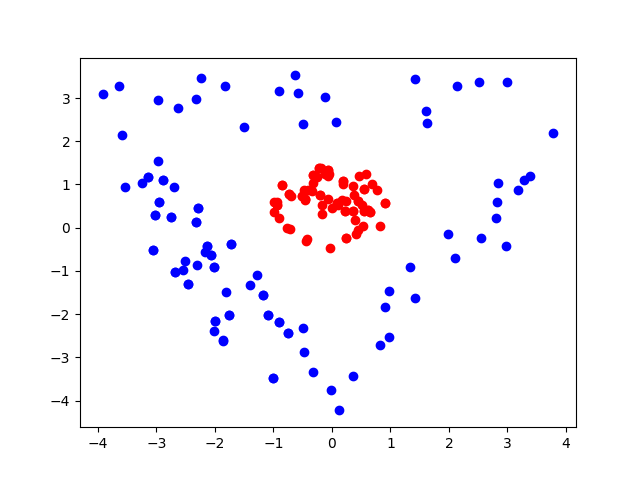

In [5]:
datafn_to_scatter(new_triforce)

<IPython.core.display.Javascript object>


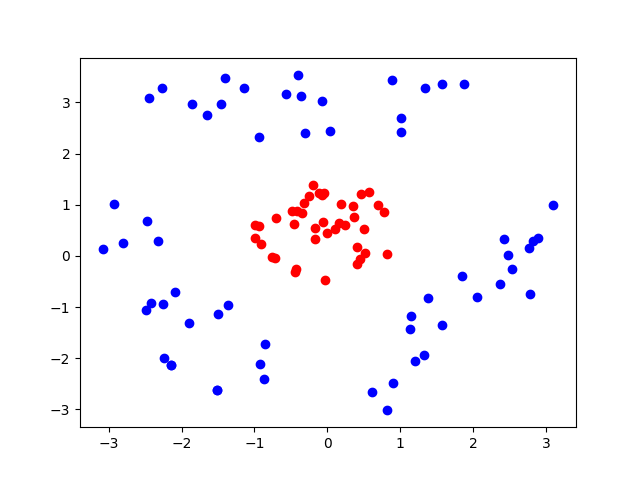

In [10]:
#triforce
np.random.seed(22)
N1=20
xpos1=sample_disk(2.5,0.75,0.,N1)+np.array([[0.,3.]])
xpos2=sample_disk(2.5,0.75,np.pi/3.,N1)+np.array([[2.,-1.]])
xpos3=sample_disk(2.5,0.75,-np.pi/3.,N1)+np.array([[-2.,-1.]])

N2=40
xneg=sample_circle(N2)+np.array([[0.,0.5]])

npX=np.vstack([xpos1,xpos2,xpos3,xneg])
npY=Ylabels(3*N1,N2)

show_scatter(npX,npY)
plt.show()

<IPython.core.display.Javascript object>


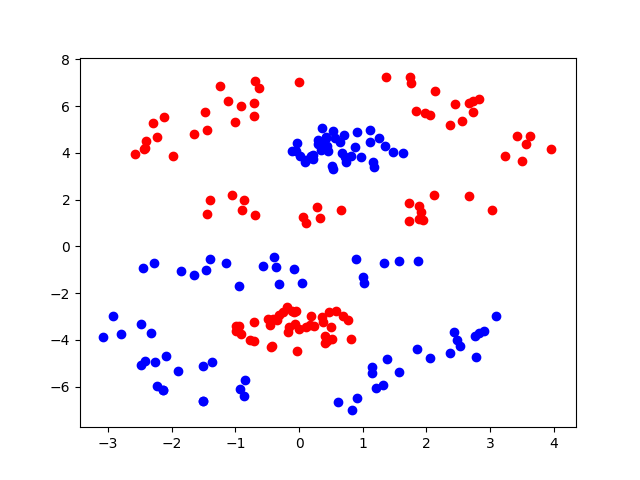

In [18]:
seed=22
m=20

np.random.seed(seed)
second_seed=np.random.randint(seed+1,seed+101)
npX1,npY1=data2(return_numpy=True,m=m,seed=seed).values()
npX2,npY2=data2(return_numpy=True,m=m,seed=second_seed).values()
assert npY1.shape[-1]==1#dicts are technically unordered
shift=np.array([0.,-4.])
npX1+=shift
npX2+=shift
npX2*=np.array([1.,-1])
#npX2+=np.array([0.3,0.3])#firsttry. 
npX2+=np.array([0.7,0.7])
npX=np.vstack([npX1,npX2])
npY=np.vstack([npY1,-npY2])#flip sign second sample
show_scatter(npX,npY)

<IPython.core.display.Javascript object>


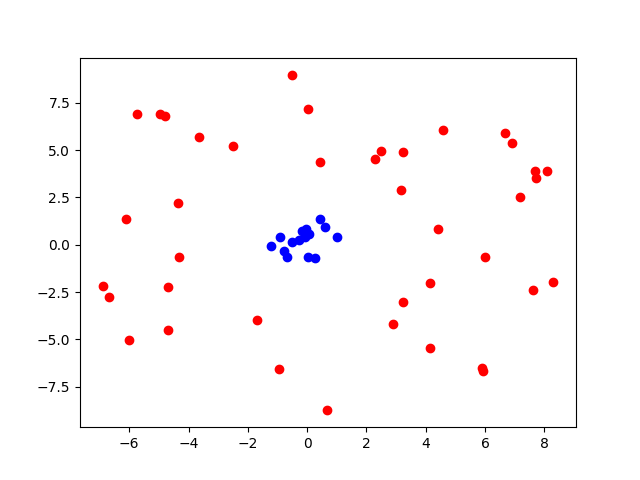

In [10]:
N1=15
N2=40
r1=1.5
r2=4.
r3=9.
X1=np.vstack(make_bullseye(r1,r2,r3,N1,N2))
X2=np.vstack(make_bullseye(r1,r2,r3,N1,N2))
Y1=Ylabels(N1,N2)
Y2=Ylabels(N1,N2)
npX=X1
npY=Y1

#npX=np.vstack([X1,X2])
#npY=np.vstack([Y1,-Y2])
show_scatter(npX,npY)

<IPython.core.display.Javascript object>


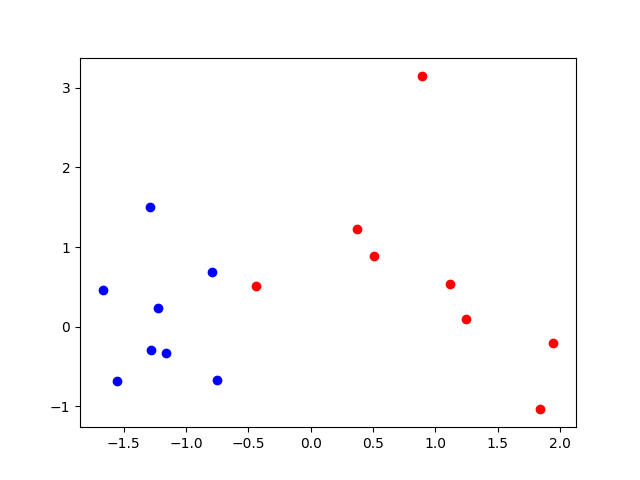

In [11]:
#R2Clean
np.random.seed(27)
rX=np.random.rand(5,2)*4.-2.#Not used. need for seed to work.
#ax.scatter(rX[:,0],rX[:,1])
pX=np.random.multivariate_normal([-1.,0.]  ,[[0.3,0],[0,1.5]], 8)
nX=np.random.multivariate_normal([+1.,0.]  ,[[0.3,0],[0,1.5]], 8)
#rX=np.array([[0.1,-0.5],
#             [0.9,-1.3],
#             [-1.4,2.8],
#             [0.3,2.5],
#             [1.7,2.0]])
#rY=np.array([1.,-1,-1.,1.,-1]).reshape([-1,1])
npX=np.vstack([pX,nX])
npY=np.vstack([np.ones((pX.shape[0],1)),-np.ones((nX.shape[0],1))]).astype(np.int64)
show_scatter(npX,npY)

<IPython.core.display.Javascript object>


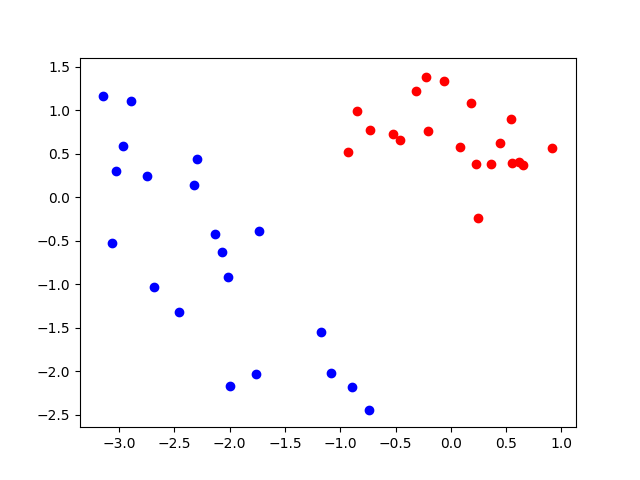

In [8]:
datafn_to_scatter(uniforce)

<IPython.core.display.Javascript object>


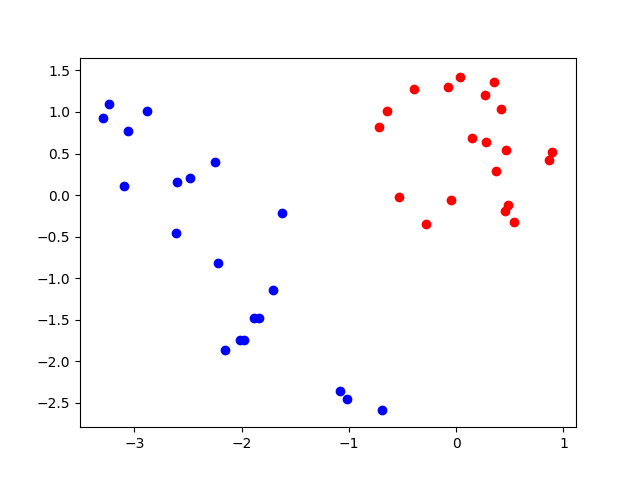

In [4]:
m=20
N1=m #20
xpos3=sample_disk(2.5,0.75,-np.pi/3.,N1)+np.array([[-2.,-1.]])

N2=m#40 #dont imbalance
xneg=sample_circle(N2)+np.array([[0.,0.5]])

cleanX=np.vstack([xpos3,xneg])
cleanY=Ylabels(N1,N2)

show_scatter(cleanX,cleanY)

<IPython.core.display.Javascript object>


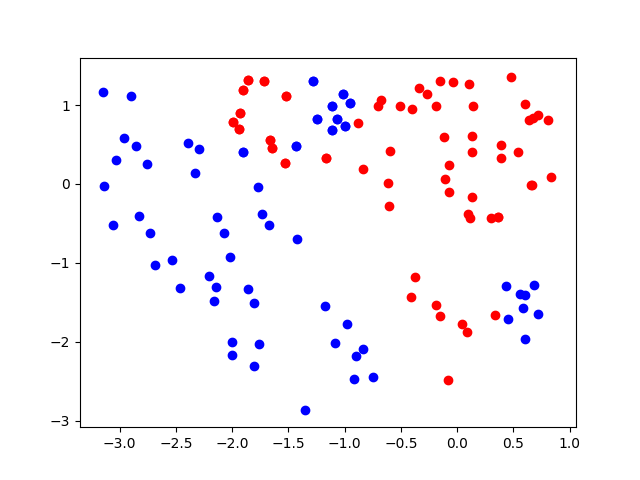

In [18]:

#noisy3
cleanX,cleanY=uniforce(return_numpy=True,m=40).values()

npX1,npY1=R2Clean(return_numpy=True).values()
npX1*=(-1./3.2)
npX1+=np.array([0.2,-1.5])

npX2,npY2=R2NoisyV2(return_numpy=True).values()
npX2*=(-1/4.2)
npX2+= np.array([-1.5,1.])
show_scatter(npX2,npY2)

npX=np.vstack([cleanX,npX1,npX2])
npY=np.vstack([cleanY,npY1,npY2])
show_scatter(npX,npY)

<IPython.core.display.Javascript object>


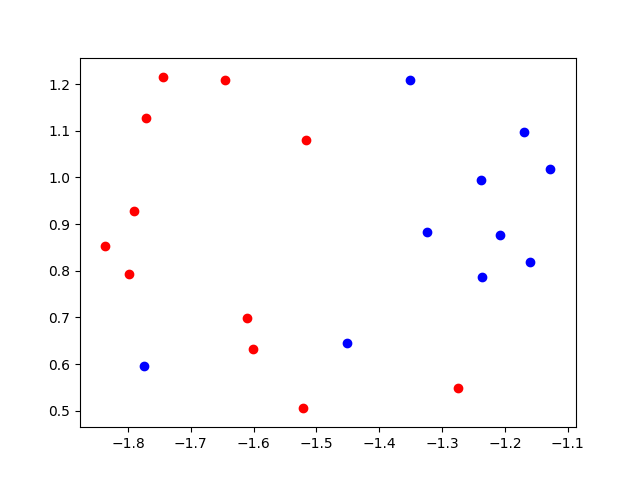

In [58]:
npX1.min(),npX1.max()

(-26.910009981515948, 26.67744458023822)

<IPython.core.display.Javascript object>


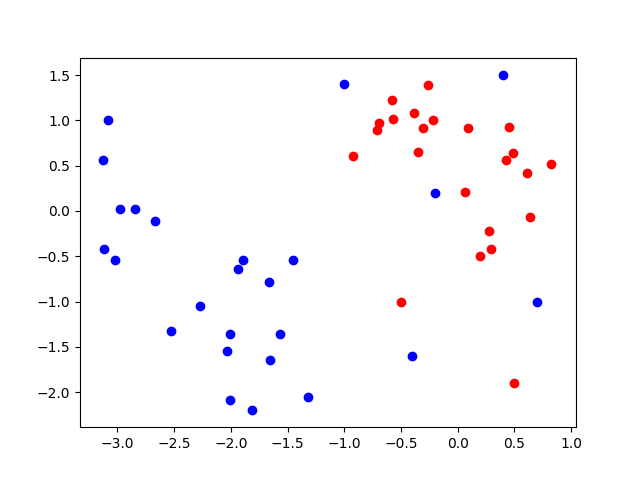

In [55]:
#noisy3
npX1,npY1=valley_data(return_numpy=True)

#noiseX=np.array([[.5,-1.9],[-0.5,-1.],[0.2,-0.5],
#                 [-.2,.2],[0.7,-1.0],[-0.4,-1.6],[-1.,1.4],[0.4,1.5]])
#noiseY=np.array([-1,-1,-1,1,1,1,1,1]).reshape([-1,1])
npX=np.vstack([cleanX,noiseX])
npY=np.vstack([cleanY,noiseY])
show_scatter(npX,npY)

<IPython.core.display.Javascript object>


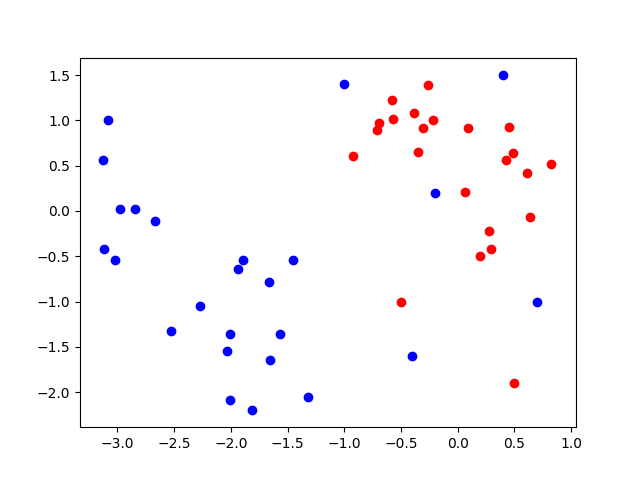

In [55]:
#noisy1
noiseX=np.array([[.5,-1.9],[-0.5,-1.],[0.2,-0.5],
                 [-.2,.2],[0.7,-1.0],[-0.4,-1.6],[-1.,1.4],[0.4,1.5]])
noiseY=np.array([-1,-1,-1,1,1,1,1,1]).reshape([-1,1])
npX=np.vstack([cleanX,noiseX])
npY=np.vstack([cleanY,noiseY])
show_scatter(npX,npY)

<IPython.core.display.Javascript object>


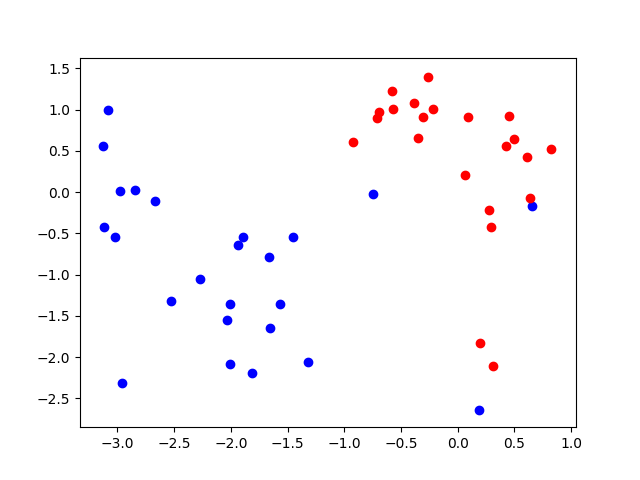

In [48]:
#noisy2
noiseX=np.array([[-2.5,1.3],[-1.2,0.3],[-0.5,-1.6],
                [0.5,-1.0],[-1.5,1.4]])
noiseY=np.array([-1,-1,-1,1,1]).reshape([-1,1])

npX=np.vstack([cleanX,noiseX])
npY=np.vstack([cleanY,noiseY])
show_scatter(npX,npY)

In [45]:
noiseY.shape

(1, 5)

In [ ]:
noiseY=np.random.randint

In [19]:
# noise_seed=222
# np.random.seed(noise_seed)
# sz_noise=6
# noiseX=np.random.uniform(npX.min(),npX.max(),[sz_noise,2])
# noiseY=np.random.randint(0,2,[sz_noise,1])*2.-1

array([[ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.]])